In [1]:
# Michael Nath

In [19]:
# import the necessary modules for diffusion function
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import signal
import imageio
%matplotlib inline
images = []

In [20]:
# Diffuse function: takes in predator and prey matrices and uses convolution and a laplacian matrix to simulate diffusion per iter

In [21]:
def Diffuse(numIter, A, B, dt, dA, dB, lapl, plot_iter):
    print("Running Simulation")
    start = time.time()
    
#     Running the simulation
    for iter in range(numIter):
        A_new = A + (dA * signal.convolve2d(A, lapl, mode="same", boundary="fill", fillvalue=0)) * dt
        B_new = B + (dB * signal.convolve2d(B, lapl, mode="same", boundary="fill", fillvalue=0)) * dt
        A = np.copy(A_new)
        B = np.copy(B_new)
        if (iter % plot_iter == 0):
            plt.clf()
            plt.imshow((B / (A + B)), cmap='Spectral')
            plt.axis('off')
            now = time.time()
#           print("Seconds since epoch = ", now - start)
#           plt.show()
            filename = 'dif_images/diffusion_' + str(iter) + '.png'
            plt.savefig(filename)
            images.append(imageio.imread(filename))
    return A, B

In [22]:
# defining props of grid
grid_size = 101 # Needs to be an odd number. Probably has to do something with edge cases
numIter = 1000
seed_size = 11 # needs to be an odd number. 
A = np.ones((grid_size, grid_size))
B = np.zeros((grid_size, grid_size))

# Seed the predators
B[int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1, \
int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1] = \
np.ones((seed_size,seed_size))

In [23]:
# defining simulation variables
dt = 1.0
dA = 0.5
dB = 0.25
lapl = np.array([[0.05, 0.2, 0.05],[0.2, -1.0, 0.2],[0.05, 0.2, 0.05]])
plot_iter = 50

Running Simulation


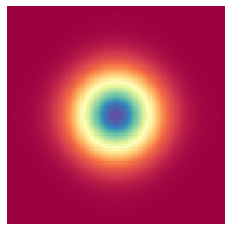

In [24]:
# Run Diffuse Function
Diffuse(numIter, A, B, dt, dA, dB, lapl, plot_iter)
imageio.mimsave('dif_images/0diffusion_movie.gif', images)